In [2]:
import serial
import numpy as np
import time
from os import system

%matplotlib notebook
import matplotlib.pyplot as plt


<IPython.core.display.Javascript object>


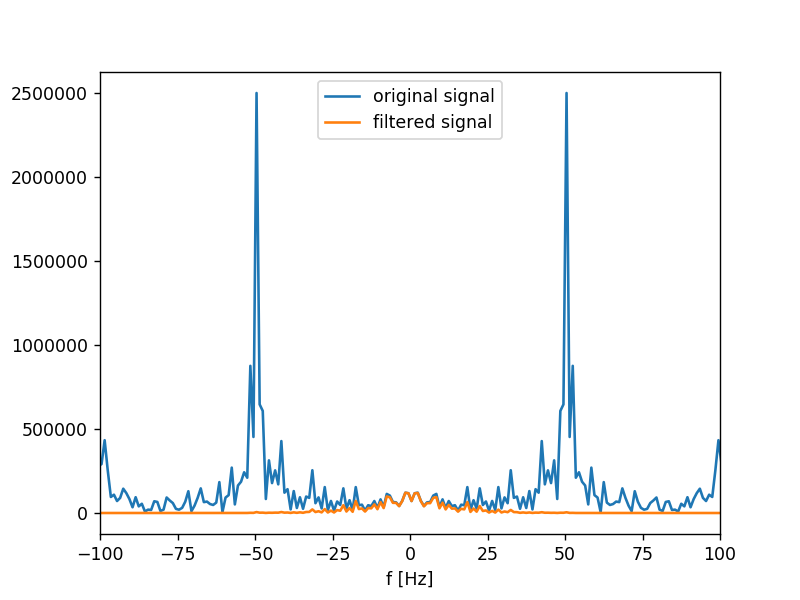

<IPython.core.display.Javascript object>


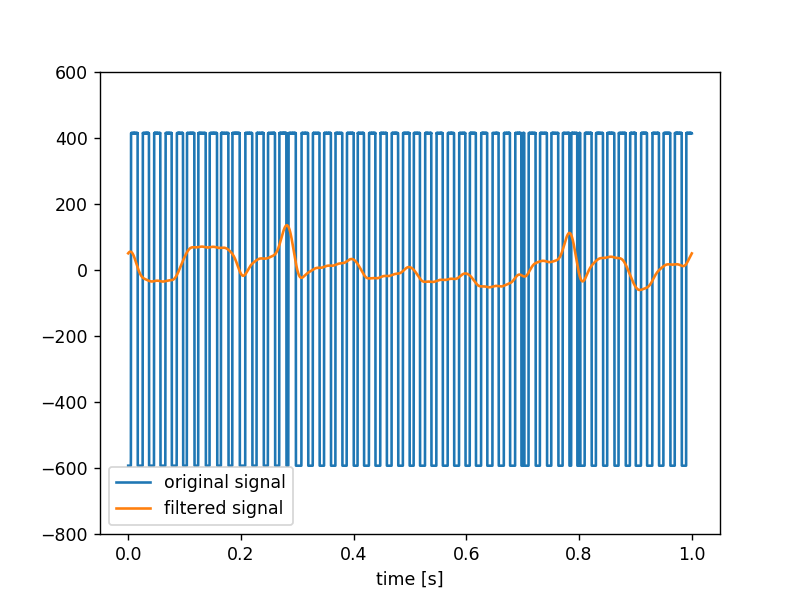

In [5]:

temp = np.loadtxt('example.txt')
t = temp[0,:]
data_actual = temp[1,:]

## DEFINE FREQUENCY DOMAIN
nfft = len(data_actual) # number of points
dt = t[1]-t[0]  # time interval
maxf = 1/dt     # maximum frequency
df = 1/np.max(t)   # frequency interval
f_fft = np.arange(-maxf/2,maxf/2+df,df)          # define frequency domain

## DO FFT
data_actual_fft = np.fft.fftshift(np.fft.fft(data_actual)) # FFT of data

## NOW DO GAUSSIAN FILTER
sigma_gauss = 20  # width of gaussian
gauss_filter = np.exp(-(f_fft)**2/sigma_gauss**2)   # gaussian filter used

signal_f_filtered= data_actual_fft*gauss_filter     # gaussian filter spectrum in frquency domain
signal_t_filtered = np.fft.ifft(np.fft.ifftshift(signal_f_filtered))     # bring filtered signal in time domain


## signal in frequency domain, and filter
plt.figure()
plt.plot(f_fft,(np.abs(data_actual_fft)),label='original signal')
plt.plot(f_fft,(np.abs(signal_f_filtered)),label = 'filtered signal')
plt.xlabel('f [Hz]')
plt.xlim([-100,100])
plt.legend()
plt.show()

## signal in time domain, and filter

plt.figure()
plt.plot(t,data_actual, label = 'original signal')
plt.plot(t,signal_t_filtered, label = 'filtered signal')
plt.xlabel('time [s]')
plt.ylim([-800,600])
plt.legend()
plt.show()
